In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import numpy as np

In [439]:
variation_test_csv = pd.read_csv('csv_files/df_final_experiment_clients.txt')

In [440]:
variation_test_csv.head()

client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control

In [441]:
footprint1_csv = pd.read_csv('csv_files/df_final_web_data_pt_1.txt')

In [442]:
footprint1_csv.head()

client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  2017-04-17 15:27:07  
1  2017-04-17 15:26:51  
2  2017-04-17 15:19:22  
3  2017-04-17 15:19:13  
4  2017-04-17 15:18:04

In [443]:
footprint2_csv = pd.read_csv('csv_files/df_final_web_data_pt_2.txt')

In [444]:
footprint2_csv.shape

(412264, 5)

In [445]:
footprint2_csv.head()

client_id             visitor_id                      visit_id  \
0     763412  601952081_10457207388  397475557_40440946728_419634   
1    6019349  442094451_91531546617  154620534_35331068705_522317   
2    6019349  442094451_91531546617  154620534_35331068705_522317   
3    6019349  442094451_91531546617  154620534_35331068705_522317   
4    6019349  442094451_91531546617  154620534_35331068705_522317   

  process_step            date_time  
0      confirm  2017-06-06 08:56:00  
1      confirm  2017-06-01 11:59:27  
2       step_3  2017-06-01 11:58:48  
3       step_2  2017-06-01 11:58:08  
4       step_1  2017-06-01 11:57:58

In [446]:
customer_csv = pd.read_csv('csv_files/df_final_demo.txt')

In [447]:
customer_csv.head()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0

# Limpieza pre-unión de DataFrames

- **Eliminamos clientes con valores nulos en la columna 'clnt_tenure_yr'**

In [448]:
null_years_client= customer_csv["clnt_tenure_yr"].isna().sum()
customer_csv = customer_csv.dropna(subset=['clnt_tenure_yr'])
print(f"Había {null_years_client} filas con valores nulos que se han eliminado")

Había 14 filas con valores nulos que se han eliminado


- **Renombramos la columna 'Variation' pasándola a 'variation'**: 

In [449]:
variation_test_csv.rename(columns={'Variation': 'variation'}, inplace=True)

- **Eliminamos las filas con valores nulos en la columna 'variation'**

In [450]:
nulos_var= variation_test_csv["variation"].isna().sum()
print(f"Había {nulos_var} filas con valores nulos que se han eliminado")
variation_test_csv = variation_test_csv.dropna(subset=['variation'])
variation_test_csv

Había 20109 filas con valores nulos que se han eliminado


client_id variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
50495     393005   Control
50496    2908510   Control
50497    7230446      Test
50498    5230357      Test
50499    6334360      Test

[50500 rows x 2 columns]

- **Renombramos los valores que aparecen dentro de 'variation'**: Los convertimos en valores booleanos 

In [451]:
variation_test_csv["variation"].value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

In [452]:
variation_replace = {"Test": 1, "Control": 0}
variation_test_csv["variation"]= variation_test_csv["variation"].replace(variation_replace)

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_74329/2264563777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  variation_test_csv["variation"]= variation_test_csv["variation"].replace(variation_replace)


In [453]:
variation_test_csv["variation"].value_counts()

variation
1    26968
0    23532
Name: count, dtype: int64

# Unión de DataFrames

- **Concatenamos footprints**: 

In [454]:
footprint_csv = pd.concat([footprint1_csv, footprint2_csv], ignore_index=True)

In [455]:
footprint_csv.head(5)

client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  2017-04-17 15:27:07  
1  2017-04-17 15:26:51  
2  2017-04-17 15:19:22  
3  2017-04-17 15:19:13  
4  2017-04-17 15:18:04

- **Corregimos los nombres de los pasos en process_step**: Ahora que tenemos juntos los dos data sets de footprints

In [456]:
footprint_csv["process_step"].value_counts() 

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [457]:
process_replace = {"start": 0, "step_1": 1, "step_2": 2, "step_3": 3, "confirm": 4}
footprint_csv["process_step"]= footprint_csv["process_step"].replace(process_replace)

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_74329/2737519529.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  footprint_csv["process_step"]= footprint_csv["process_step"].replace(process_replace)


- **Hacemos merge del DataFrame de variations con el de footprint**: Usando el valor común del client_id

In [458]:
df=pd.merge(footprint_csv, variation_test_csv, on='client_id', how='left')    
df.head(5)
#podemos ver que al haber valores NaN en la columna variation, 
# los valores se habrían convertido en float si hubieran sido int

client_id            visitor_id                      visit_id  \
0    9988021  580560515_7732621733  781255054_21935453173_531117   
1    9988021  580560515_7732621733  781255054_21935453173_531117   
2    9988021  580560515_7732621733  781255054_21935453173_531117   
3    9988021  580560515_7732621733  781255054_21935453173_531117   
4    9988021  580560515_7732621733  781255054_21935453173_531117   

   process_step            date_time  variation  
0             3  2017-04-17 15:27:07        1.0  
1             2  2017-04-17 15:26:51        1.0  
2             3  2017-04-17 15:19:22        1.0  
3             2  2017-04-17 15:19:13        1.0  
4             3  2017-04-17 15:18:04        1.0

In [459]:
# este es el df de aquellos clientes que no tienen asignado un valor en la columna variation
# con lo cual no aportan información en cuanto al AB testing
missing_variation = footprint_csv[~footprint_csv['client_id'].isin(variation_test_csv['client_id'])]
missing_variation.sample(5)

client_id             visitor_id                      visit_id  \
525361    8008633  393842304_91443302579  232202405_94359985495_748318   
484922    2215069   722462004_4819266222  438208763_88522149290_637836   
732493    2536280   98416701_25069829283  521785224_90568381184_204404   
277119    9021783  176471480_13971110987  987644532_90994791337_957995   
523341    2411009  704976642_90150101296  790494724_39946046662_796527   

        process_step            date_time  
525361             2  2017-06-01 13:36:06  
484922             2  2017-06-01 18:57:45  
732493             0  2017-06-15 17:24:51  
277119             2  2017-04-05 12:11:26  
523341             1  2017-05-24 15:57:50

- **Hacemos el merge que queda**: Volvemos a usar client_id como punto de unión.

In [460]:
df=pd.merge(df,customer_csv, on='client_id', how='left')
#hacemos merge del último data set que quedaba 
df.sample(5)

client_id             visitor_id                      visit_id  \
378991    4576989  218181113_91780502497   31485032_23396080127_685984   
320255    6706352  993239614_73444606161  122621405_84538669637_527099   
315293    4649506  921752788_48879444121    339064071_21685583447_8588   
18717     8963150  889367950_43040020241  722219123_97957291076_838779   
306473    9034647  546361849_75216186017  778452953_62623387977_890899   

        process_step            date_time  variation  clnt_tenure_yr  \
378991             4  2017-05-15 15:51:55        0.0            15.0   
320255             0  2017-04-03 11:33:18        NaN             6.0   
315293             1  2017-03-31 08:50:33        NaN            14.0   
18717              0  2017-04-19 11:23:45        1.0            10.0   
306473             0  2017-04-02 20:38:59        NaN            15.0   

        clnt_tenure_mnth  clnt_age gendr  num_accts        bal  calls_6_mnth  \
378991             190.0      65.0     M        2.0   44537.65           0.0   
320255              75.0      87.5     U        2.0  295907.68           6.0   
315293             170.0      49.0     F        2.0  128098.36           1.0   
18717              122.0      30.5     M        3.0  224959.42           6.0   
306473             183.0      58.5     F        2.0   16023.79           1.0   

        logons_6_mnth  
378991            3.0  
320255            6.0  
315293            1.0  
18717             9.0  
306473            1.0

# Limpieza y control de los datos post merge

- **Limpieza de valores nulos en variation**: Al ser un dato crucial no nos aporta información valiosa una fila de cliente sin este dato.
Eliminamos las filas con valores nulos en variation con la seguridad de que están guardados en missing_variation

In [461]:
nulos_var_df= df["variation"].isna().sum()
print(f"Había {nulos_var_df} filas con valores nulos que se han eliminado")
df.dropna(subset=['variation'],inplace=True)
variation_test_csv.sample(5)

Había 434096 filas con valores nulos que se han eliminado


client_id  variation
16846    9436400          0
12915    7055464          0
29900     595657          0
48633    2230745          0
33486    2797503          0

- **Limpieza de valores nulos en clnt_tenure_yr**

In [462]:
nulos_yr_df= df["clnt_tenure_yr"].isna().sum()
print(f"Había {nulos_yr_df} filas con valores nulos que se han eliminado")
df = df.dropna(subset=['clnt_tenure_yr'])

Había 102 filas con valores nulos que se han eliminado


- **Conversión a int de floats**

In [463]:
df["clnt_tenure_yr"] = df["clnt_tenure_yr"].astype(int)
df["clnt_tenure_mnth"] = df["clnt_tenure_mnth"].astype(int)
df["num_accts"] = df["num_accts"].astype(int)
df["variation"] = df["variation"].astype(int)
df["calls_6_mnth"] = df["calls_6_mnth"].astype(int)
df["logons_6_mnth"] = df["logons_6_mnth"].astype(int)

- **Examinamos los valores nulos**

In [464]:
df.isnull().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
variation            0
clnt_tenure_yr       0
clnt_tenure_mnth     0
clnt_age            12
gendr                0
num_accts            0
bal                  0
calls_6_mnth         0
logons_6_mnth        0
dtype: int64

# Creación de rangos de edades

In [465]:
#falta por hacer

# Análisis de los clientes



- **Examinamos la edades**: Se comprueba que no existan edades que no tengan sentido y se crea un grupo con los outliers que nos interesen para poder analizarlo.

In [466]:
outliers_age = df[(df['clnt_age'] < 18) | (df['clnt_age'] > 95)]
outliers_grouped = outliers_age[['client_id', 'clnt_age']].drop_duplicates()

#podemos ver que hay clientes menores de 18, qué hacer con eso? 
outliers_grouped

client_id  clnt_age
14509     7953598      17.5
24437     5114008      17.5
33734     4996294      17.5
37287     7128753      17.5
38951     1273146      17.5
...           ...       ...
226347    8927242      17.5
236209    2064675      17.5
415436    9206649      96.0
492703    2364116      17.0
520387    2771150      17.0

[65 rows x 2 columns]

- **Creación de un df en el que analizar únicamente el tipo de cliente que nos interesa**

In [467]:
client_analysis_df = df.dropna().copy()
client_analysis_df.sample(5)

client_id             visitor_id                      visit_id  \
7686      8585073  160549393_32629727443  285159334_34628406986_475346   
493867    7556563  346478644_26024196579  621531876_78064962852_926466   
66223     2155749   223919466_9086294865  582724649_63759446067_544745   
463827    3587545    28782387_4178505716  412793498_45907992806_700612   
39898     4419732   259876621_1373257417  498926691_30550525006_770855   

        process_step            date_time  variation  clnt_tenure_yr  \
7686               4  2017-04-05 11:40:56          1              22   
493867             0  2017-05-25 13:55:08          0              27   
66223              1  2017-04-20 02:44:14          1              20   
463827             0  2017-05-24 09:13:46          1               7   
39898              0  2017-04-10 20:18:39          0              15   

        clnt_tenure_mnth  clnt_age gendr  num_accts        bal  calls_6_mnth  \
7686                 271      59.5     U          3   59373.18             6   
493867               335      78.0     F          2  224991.93             1   
66223                242      75.0     F          2   52800.24             6   
463827                92      64.0     U          2  158181.94             6   
39898                180      38.0     U          2   38840.50             5   

        logons_6_mnth  
7686                9  
493867              4  
66223               9  
463827              9  
39898               8

- **Creamos un group by client_id.** Ya que no interesa para el analisis del tipo de cliente que haya más de una fila por cada cliente, datos del tipo edad, genero, etc, no van a verse afectados por la columna date_time.

In [468]:
unique_client_analysis_df = client_analysis_df.groupby('client_id').agg({
    'gendr': 'last',  # He comprobado que no haya clientes que cambien pero por si acaso
    'clnt_age': 'first',             
    'logons_6_mnth': 'first', 
    'clnt_tenure_yr':'first',
    'clnt_tenure_mnth': 'first',
    'num_accts':'first',
    'bal':'first',
    'calls_6_mnth':'first',
    'logons_6_mnth':'first'    
}).reset_index()
unique_client_analysis_df.sample(5)


client_id gendr  clnt_age  logons_6_mnth  clnt_tenure_yr  \
8403     1678508     M      30.0              4               8   
27984    5559421     F      33.5              5              13   
22036    4391277     F      54.5              6              25   
25701    5114142     U      52.0              7               6   
5674     1138609     M      62.5              3               9   

       clnt_tenure_mnth  num_accts        bal  calls_6_mnth  
8403                107          2   44002.49             1  
27984               156          2   34510.85             2  
22036               311          2  213023.14             3  
25701                82          2   65808.45             4  
5674                119          2   43493.22             0

- **Hacemos un describe para entender los datos.** A grandes rasgos, y sin haber entrado todavía a limpiar en profundidad.

In [469]:
unique_client_analysis_df.describe()

client_id      clnt_age  logons_6_mnth  clnt_tenure_yr  \
count  5.048700e+04  50487.000000   50487.000000    50487.000000   
mean   5.006180e+06     47.319795       6.131856       12.031810   
std    2.877445e+06     15.518616       2.175441        6.860326   
min    5.550000e+02     17.000000       3.000000        2.000000   
25%    2.515688e+06     33.500000       4.000000        6.000000   
50%    5.025043e+06     48.000000       6.000000       11.000000   
75%    7.477922e+06     59.500000       8.000000       16.000000   
max    9.999832e+06     96.000000       9.000000       55.000000   

       clnt_tenure_mnth     num_accts           bal  calls_6_mnth  
count      50487.000000  50487.000000  5.048700e+04  50487.000000  
mean         150.416365      2.254580  1.495168e+05      3.093272  
std           81.945403      0.533675  3.020390e+05      2.188009  
min           33.000000      1.000000  2.378944e+04      0.000000  
25%           82.000000      2.000000  3.987718e+04      1.000000  
50%          136.000000      2.000000  6.573433e+04      3.000000  
75%          192.000000      2.000000  1.399583e+05      5.000000  
max          669.000000      7.000000  1.632004e+07      6.000000

- **Creamos unas gráficas que nos ayuden a entender los datos.**

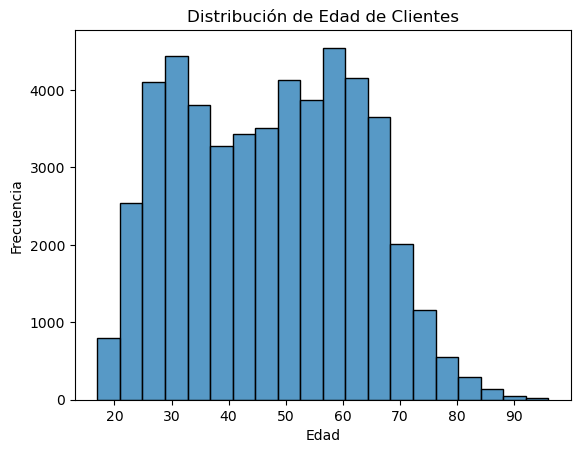

In [470]:
sns.histplot(unique_client_analysis_df['clnt_age'], bins=20)
plt.title('Distribución de Edad de Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

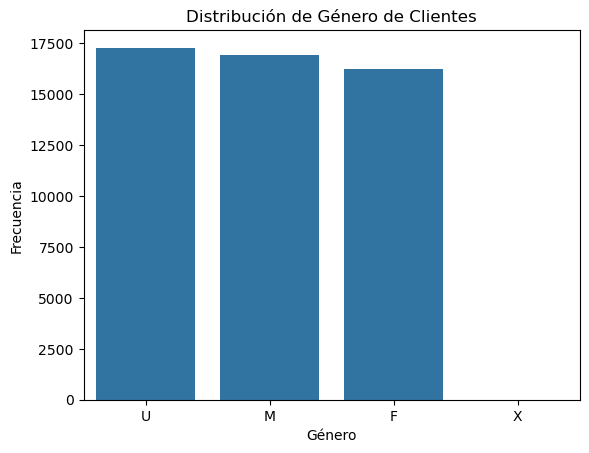

In [471]:
sns.countplot(data=unique_client_analysis_df, x='gendr')
plt.title('Distribución de Género de Clientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

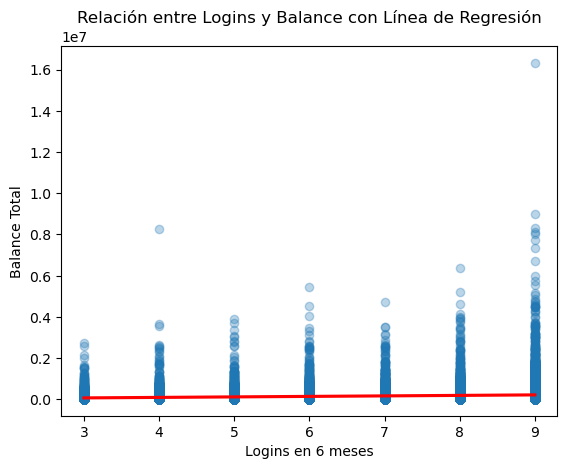

In [472]:
sns.regplot(data=unique_client_analysis_df, x='logons_6_mnth', y='bal', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Logins y Balance con Línea de Regresión')
plt.xlabel('Logins en 6 meses')
plt.ylabel('Balance Total')
plt.show()

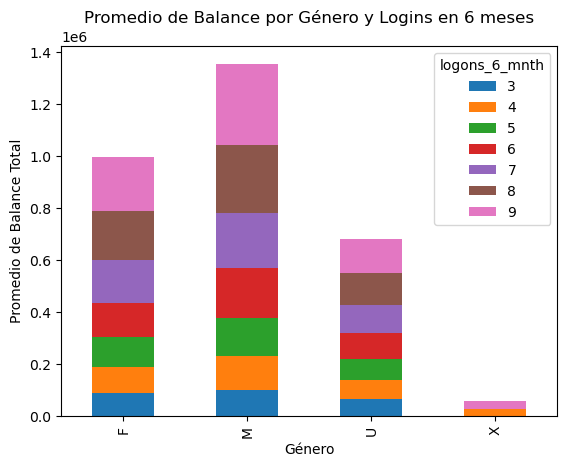

In [473]:
balance_gender_logons = unique_client_analysis_df.groupby(['gendr', 'logons_6_mnth'])['bal'].mean().unstack()

# Gráfico de barras apiladas
balance_gender_logons.plot(kind='bar', stacked=True)
plt.title('Promedio de Balance por Género y Logins en 6 meses')
plt.xlabel('Género')
plt.ylabel('Promedio de Balance Total')
plt.show()

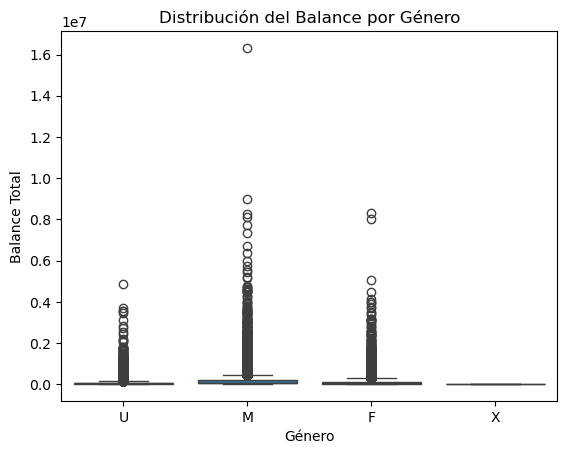

In [474]:
sns.boxplot(data=unique_client_analysis_df, x='gendr', y='bal')
plt.title('Distribución del Balance por Género')
plt.xlabel('Género')
plt.ylabel('Balance Total')
plt.show()

- **Analizamos Skewness y Kurtosis de algunos datos**

In [475]:
skewness_bal = unique_client_analysis_df['bal'].skew()
kurtosis_bal = unique_client_analysis_df['bal'].kurtosis()

print(f'skewness del balance: {skewness_bal}, hay un número significativo de clientes con balances muy altos')
print(f'Kurtosis del balance: {kurtosis_bal}, la distribución tiene una cantidad inusualmente alta de outliers.')

skewness_years = unique_client_analysis_df['clnt_tenure_yr'].skew()
kurtosis_years = unique_client_analysis_df['clnt_tenure_yr'].kurtosis()

print(f'skewness del clnt_tenure_yr: {skewness_years} hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes')
print(f'Kurtosis del clnt_tenure_yr: {kurtosis_years}, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media')

skewness del balance: 11.47407650252342, hay un número significativo de clientes con balances muy altos
Kurtosis del balance: 294.1124758573803, la distribución tiene una cantidad inusualmente alta de outliers.
skewness del clnt_tenure_yr: 1.0317878940266119 hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes
Kurtosis del clnt_tenure_yr: 1.0179025974588907, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media


- **Investigamos quiénes serían nuestros clientes VIP, estándar y otros:**
Según el balance en las cuentas y número de cuentas

In [476]:
unique_client_analysis_df.sort_values('bal', ascending=False).head(10)

client_id gendr  clnt_age  logons_6_mnth  clnt_tenure_yr  \
46967    9286288     M      62.5              9              21   
35733    7070097     M      53.0              9              11   
47748    9440656     F      63.0              9               7   
11501    2291985     M      41.0              4               7   
8399     1678193     M      65.5              9              24   
34140    6762377     F      41.5              9              16   
17642    3519657     M      66.5              9              18   
4950      987970     M      74.5              9              14   
4313      857273     M      56.5              9              31   
46993    9290030     M      67.5              8              28   

       clnt_tenure_mnth  num_accts          bal  calls_6_mnth  
46967               254          3  16320040.15             6  
35733               133          2   8986419.77             6  
47748                94          2   8292996.21             6  
11501                85          2   8247729.97             1  
8399                299          3   8137343.24             6  
34140               193          3   8045102.60             6  
17642               218          6   7741994.01             6  
4950                179          3   7339443.17             4  
4313                376          5   6716305.28             6  
46993               341          4   6353000.43             5

In [477]:
# percentiles altos del balance de las cuentas y número de ellas para VIP, estándar o nada
percentile_85_bal = df['bal'].quantile(0.85)
percentile_85_accts = df['num_accts'].quantile(0.85)

percentile_40_bal = df['bal'].quantile(0.40)
percentile_40_accts = df['num_accts'].quantile(0.40)

# función para clasificar los clientes
def class_client(df):
    if df['bal'] >= percentile_85_bal and df['num_accts'] >= percentile_85_accts:
        return 0 #vip
    elif df['bal'] >= percentile_40_bal and df['num_accts'] >= percentile_40_accts:
        return 1 #estándar
    else:
        return 2 #nada
    
df['client_type'] = df.apply(class_client, axis=1)

df.sample(5)

client_id             visitor_id                      visit_id  \
371231    5454052  684179998_84883942415  391892562_53542926894_432024   
189133    2508716  921493106_78085699538    5887871_54794491131_584801   
414540    7194673  812717027_51828376665  298858891_82476504561_650444   
517520    2840019   437285959_7365849672  632811548_84676499501_510828   
125939    4123326  480636821_10298665862  489360861_12575129257_633638   

        process_step            date_time  variation  clnt_tenure_yr  \
371231             1  2017-05-01 16:02:57          0              14   
189133             3  2017-04-20 08:53:41          1              15   
414540             0  2017-05-24 15:00:48          0              11   
517520             0  2017-05-04 16:54:27          0               4   
125939             0  2017-04-06 08:04:39          1              17   

        clnt_tenure_mnth  clnt_age gendr  num_accts        bal  calls_6_mnth  \
371231               178      48.0     F          2  566874.87             6   
189133               190      75.0     F          2   62437.48             2   
414540               142      35.0     F          3   36704.91             2   
517520                57      70.0     U          2  182567.46             5   
125939               209      45.5     F          2  181347.70             4   

        logons_6_mnth  client_type  
371231              9            1  
189133              5            1  
414540              5            2  
517520              8            1  
125939              7            1

- **A pesar de que los clientes VIP tienen de media un balance mucho mayor, los clientes estándar acumulan más balance como grupo**


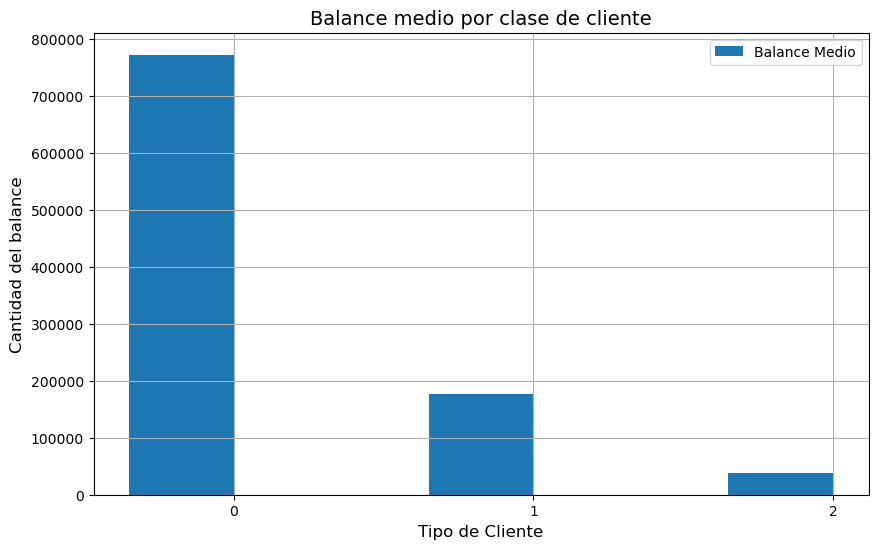

In [478]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_type_mean = df.groupby('client_type').agg(
    bal_mean=('bal', 'mean'),
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_type_mean))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices, metrics_type_mean['bal_mean'], bar_width, label='Balance Medio')

# Personalización del gráfico
plt.title('Balance medio por clase de cliente', fontsize=14)
plt.ylabel('Cantidad del balance', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_type_mean['client_type'])  # Etiquetas centradas
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

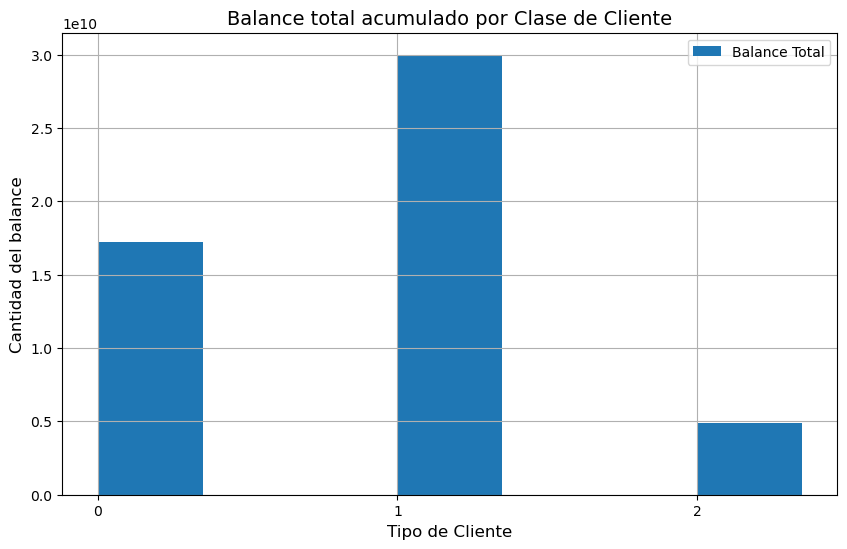

In [479]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_type_sum = df.groupby('client_type').agg(
    bal_sum=('bal', 'sum')
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_type_sum))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices + bar_width, metrics_type_sum['bal_sum'], bar_width, label='Balance Total')

# Personalización del gráfico
plt.title('Balance total acumulado por Clase de Cliente', fontsize=14)
plt.ylabel('Cantidad del balance', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_type_sum['client_type'])  # Etiquetas centradas
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

- **Vemos el mismo gráfico con respecto a número de cuentas**

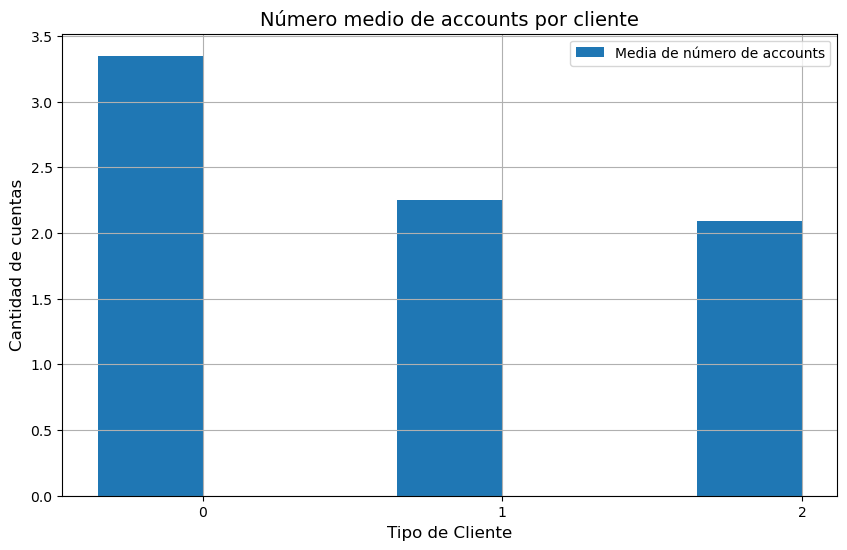

In [480]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_accts_mean = df.groupby('client_type').agg(
    accts_mean=('num_accts', 'mean'),
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_accts_mean))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices, metrics_accts_mean['accts_mean'], bar_width, label='Media de número de accounts')

# Personalización del gráfico
plt.title('Número medio de accounts por cliente', fontsize=14)
plt.ylabel('Cantidad de cuentas', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_accts_mean['client_type'])  # Etiquetas centradas
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

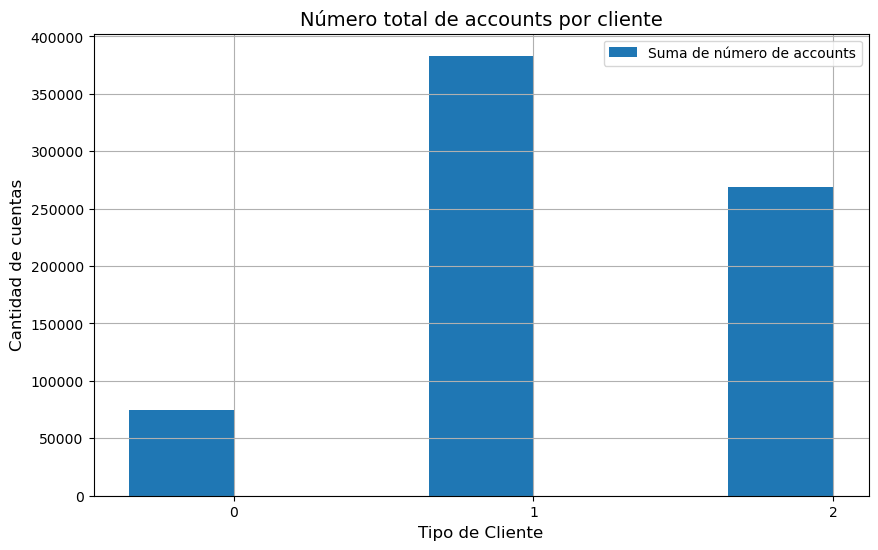

In [481]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_accts_sum = df.groupby('client_type').agg(
    accts_sum=('num_accts', 'sum'),
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_accts_sum))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices, metrics_accts_sum['accts_sum'], bar_width, label='Suma de número de accounts')

# Personalización del gráfico
plt.title('Número total de accounts por cliente', fontsize=14)
plt.ylabel('Cantidad de cuentas', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_accts_sum['client_type'])  
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

- **Limpieza de gender**: Se examinan los distintos valores de gender que hay en el data set.

In [482]:
unique_client_analysis_df['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
X        2
Name: count, dtype: int64

# Comprobaciones del Funcionamiento

- **Confirmamos que es un test ciego**: Se comprueba que no exista relación entre el género y la variation

In [483]:
contingency_table_gender_variation = pd.crosstab(client_analysis_df['gendr'], client_analysis_df['variation'], normalize='columns')
chi2, p, dof, expected = chi2_contingency(contingency_table_gender_variation)
print(f'Chi2: {chi2}, P-value: {p}')
print("Tabla de Contingencia Normalizada:")
print(contingency_table_gender_variation)

Chi2: 0.00034921226276692855, P-value: 0.9999982645682544
Tabla de Contingencia Normalizada:
variation         0         1
gendr                        
F          0.318846  0.329411
M          0.336962  0.335739
U          0.344193  0.334805
X          0.000000  0.000045


In [484]:
# Calcular los grados de libertad gender_variation
n_rows_gender_var = contingency_table_gender_variation.shape[0]  # Número de filas
n_col_gender_var = contingency_table_gender_variation.shape[1]  # Número de columnas

df_gender_var = (n_rows_gender_var - 1) * (n_col_gender_var - 1)

# Definir nivel de significancia 
alpha = 0.05

# Calcular el valor crítico 
valor_critico_gender_var = stats.chi2.ppf(1 - alpha, df_gender_var)
valor_critico_gender_var

7.814727903251179

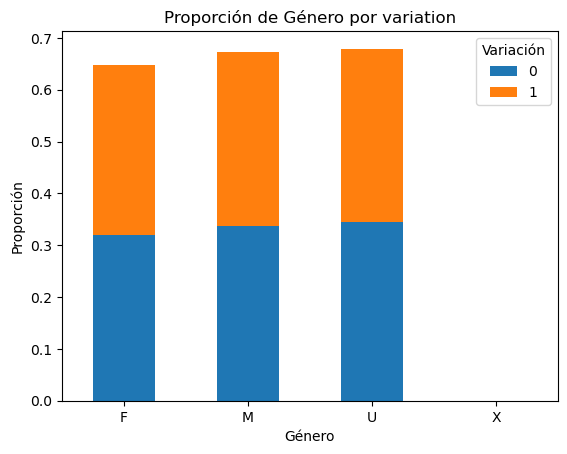

In [485]:
contingency_table_gender_variation.plot(kind='bar', stacked=True)
plt.title('Proporción de Género por variation')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Variación')
plt.show()

- **Confirmamos que es un test ciego**: Se comprueba que no exista relación entre la edad y la variation

In [486]:
contingency_table_age_variation = pd.crosstab(client_analysis_df['clnt_age'], client_analysis_df['variation'], normalize='columns')
chi2, p, dof, expected = chi2_contingency(contingency_table_age_variation)
print(f'Chi2: {chi2}, P-value: {p}')
print("Tabla de Contingencia Normalizada:")
print(contingency_table_age_variation)

Chi2: 0.016614219813777472, P-value: 1.0
Tabla de Contingencia Normalizada:
variation         0         1
clnt_age                     
17.0       0.000077  0.000045
17.5       0.001255  0.001305
18.0       0.001234  0.000787
18.5       0.001764  0.002565
19.0       0.001395  0.001451
...             ...       ...
93.5       0.000223  0.000000
94.0       0.000084  0.000073
94.5       0.000000  0.000028
95.5       0.000000  0.000034
96.0       0.000028  0.000034

[158 rows x 2 columns]


- **Tiempo transcurrido en cada paso**: Se registra cuánto tiempo se ha pasado en cada paso según la variation y el cliente.

Empezamos por step y variation y más adelante lo relacionamos con el cliente

In [487]:
df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])
df['date_time'] = pd.to_datetime(df['date_time'])
df['time_diff'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff(-1).abs()
df = df.dropna(subset=['time_diff'])
df['time_in_step'] = df['time_diff'].shift(1)
df = df.dropna(subset=['time_in_step'])


- **En este gráfico con 100 medidas al azar por paso podemos ver que hay algunos outliers pero se observan diferencias entre las variaciones A y B y el tiempo pasado en los pasos**

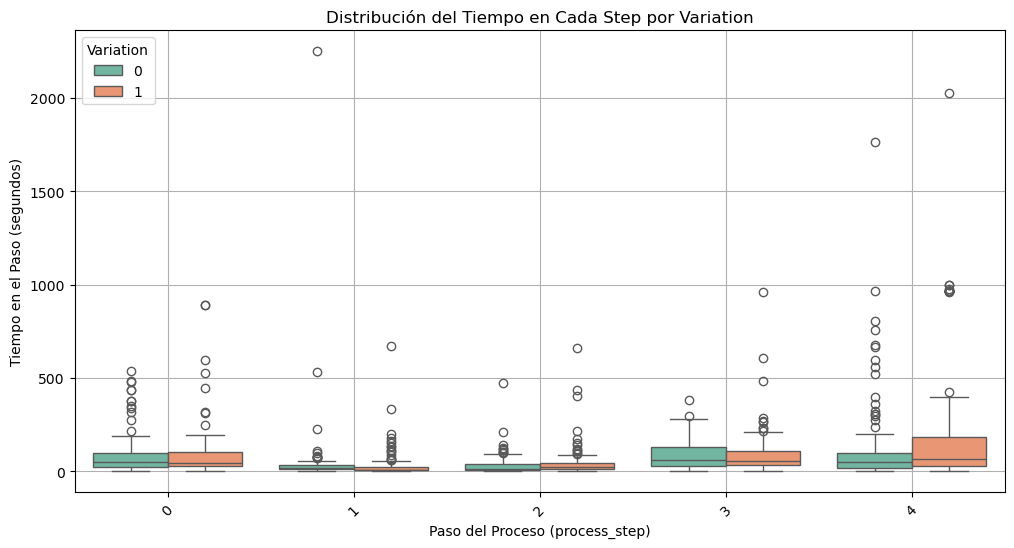

In [488]:

# 'time_in_step' en segundos
df['time_in_step'] = df['time_in_step'].dt.total_seconds()


# Seleccionamos 100 valores aleatorios del tiempo en cada step y cada variation
sampled_data = df.groupby(['process_step', 'variation'])['time_in_step'].apply(
    lambda x: x.sample(min(100, len(x)), random_state=1)
).reset_index()

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='process_step', y='time_in_step', hue='variation', data=sampled_data, palette='Set2')
plt.title('Distribución del Tiempo en Cada Step por Variation')
plt.xlabel('Paso del Proceso (process_step)')
plt.ylabel('Tiempo en el Paso (segundos)')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.grid(True)
plt.show()


In [490]:
result = df.groupby(['process_step', 'variation'])['time_in_step'].mean().reset_index()
result = result.rename(columns={'time_in_step': 'avg_time_in_step'})
result

process_step  variation  avg_time_in_step
0             0          0        125.638498
1             0          1        125.224943
2             1          0         44.111927
3             1          1         37.767317
4             2          0         38.557394
5             2          1         47.706896
6             3          0         92.143441
7             3          1         95.470857
8             4          0        142.663516
9             4          1        182.905880

In [492]:
# detectar outliers y definirlos
Q1 = df['time_in_step'].quantile(0.25)
Q3 = df['time_in_step'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# eliminar outliers
df_filtered = df[(df['time_in_step'] >= lower_bound) & (df['time_in_step'] <= upper_bound)]

clean_result = df_filtered.groupby(['process_step', 'variation'])['time_in_step'].mean().reset_index()
clean_result = clean_result.rename(columns={'time_in_step': 'avg_time_in_step'})
clean_result

process_step  variation  avg_time_in_step
0             0          0         49.899434
1             0          1         54.505345
2             1          0         28.734775
3             1          1         22.732101
4             2          0         31.643856
5             2          1         33.864009
6             3          0         65.741827
7             3          1         67.332952
8             4          0         53.773585
9             4          1         59.149376

In [429]:
# Calcular los grados de libertad
n_rows_age_variation = contingency_table_age_variation.shape[0]  # Número de filas
n_col_age_variation = contingency_table_age_variation.shape[1]  # Número de columnas

df_age_variation = (n_rows_age_variation - 1) * (n_col_age_variation - 1)

In [430]:
# Definir nivel de significancia
alpha = 0.05

# Calcular el valor crítico
valor_critico_age_variation = stats.chi2.ppf(1 - alpha, df_age_variation)
valor_critico_age_variation

187.23886994495388

- **Veces que se ha completado el proceso**: Se registra cuántas veces por variation se ha llegado al último paso del proceso. 

In [431]:
df_process_step_variation = df[df['process_step']==4].groupby('variation').count()
df_process_step_variation

client_id  visitor_id  visit_id  process_step  date_time  \
variation                                                             
0               2116        2116      2116          2116       2116   
1               4218        4218      4218          4218       4218   

           clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gendr  num_accts   bal  \
variation                                                                       
0                    2116              2116      2116   2116       2116  2116   
1                    4218              4218      4218   4218       4218  4218   

           calls_6_mnth  logons_6_mnth  client_type  time_diff  time_in_step  
variation                                                                     
0                  2116           2116         2116       2116          2116  
1                  4218           4218         4218       4218          4218

- **Veces que se ha ido hacia atrás en el proceso**: Se registra cuántas veces por step se ha retrocedido a un step anterior. Además se analiza el tiempo que ha estado el cliente en ese paso anterior una vez ha retrocedido. Todo esto teniendo en cuenta la variation. 

In [432]:
df.head(1)

client_id             visitor_id                      visit_id  \
72017        555  402506806_56087378777  637149525_38041617439_716659   

       process_step           date_time  variation  clnt_tenure_yr  \
72017             1 2017-04-15 12:58:03          1               3   

       clnt_tenure_mnth  clnt_age gendr  num_accts       bal  calls_6_mnth  \
72017                46      29.5     U          2  25454.66             2   

       logons_6_mnth  client_type       time_diff  time_in_step  
72017              6            2 0 days 00:00:32           7.0

- **Veces en que se ha realizado un salto en steps que no es posible**: Se registra cuántas veces y en qué steps se ha pasado de un step a otro que no fuera el siguiente ni el anterior y en qué steps y variation ha ocurrido.

In [433]:
df = df[df['process_step'].isin([0, 1, 2, 3, 4])]
df['process_step'] = df['process_step'].astype(int)

def salto_mayor_a_1(group):

    results = []
    # Verificar si el grupo tiene al menos dos elementos
    if len(group) < 2:
        return False 
    
    for i in range(1, len(group)):
        if abs(group['process_step'].iloc[i] - group['process_step'].iloc[i - 1]) > 1:
            d = {'client_id': group['client_id'].iloc[i],
                 'visitor_id': group['visitor_id'].iloc[i],
                 'visit_id': group['visit_id'].iloc[i],
                 'first_step': group['process_step'].iloc[i],
                 'sec_step': group['process_step'].iloc[i - 1]}
            results.append(d)  # Append the result to the list

    if results:
        return pd.DataFrame(results)
    return False

resultado=salto_mayor_a_1(df)

#clientes_con_salto = df.groupby(['client_id', 'visitor_id', 'visit_id']).apply(salto_mayor_a_1)


In [434]:
resultado.sample(15)

client_id             visitor_id                      visit_id  \
44591    9648788  849809959_94053667980  616722781_88160565838_913096   
23638    5164495  242691414_65380838145  139527504_46456022121_164337   
11795    2579748   44392315_25405590942  998301269_33643829745_912854   
19422    4246765  362646240_99755589086  595457022_54590774856_427155   
28543    6213804  165267386_31091540739  508473423_69153048218_877308   
32479    7039635   139672238_4748072654  976506095_62801161526_928216   
31741    6891129  709583874_21637770262  249231157_45628040091_886175   
3770      808084  230729545_92646511626  620217186_30365116421_765830   
22128    4839279  762600975_77509467851   793548146_7910627451_634462   
17955    3915713  981028421_51815477263  445356122_83194906088_592164   
27275    5946529  737848828_19725435627   32652662_35594529768_873980   
43599    9427465  147514934_23143773436  223579393_36284282405_906971   
38849    8388524  117769878_54506812493   570222476_62488436767_12155   
5295     1162520   50766733_32129388809  985091333_20059520753_639914   
19172    4190250  716414442_39225745742  843778110_33500576752_975650   

       first_step  sec_step  
44591           0         2  
23638           0         2  
11795           0         3  
19422           0         3  
28543           0         3  
32479           0         3  
31741           0         3  
3770            0         4  
22128           0         3  
17955           0         3  
27275           0         3  
43599           0         2  
38849           0         2  
5295            0         3  
19172           1         4

In [435]:
jumps = resultado.groupby(['first_step', 'sec_step'], as_index=False).agg(count=('first_step', 'count'))
jumps

first_step  sec_step  count
0            0         2   6230
1            0         3  32949
2            0         4   4117
3            1         3   1264
4            1         4     79
5            2         0    536
6            2         4     13
7            3         0    491
8            3         1    240
9            4         0    140
10           4         1     51
11           4         2     71

- **Veces en las que se ha pasado tiempo insuficiente en un step**: Se registra cuántas veces se ha pasado al siguiente step demasiado rápido y se relaciona con la variation.

In [436]:
df.head(1)

client_id             visitor_id                      visit_id  \
72017        555  402506806_56087378777  637149525_38041617439_716659   

       process_step           date_time  variation  clnt_tenure_yr  \
72017             1 2017-04-15 12:58:03          1               3   

       clnt_tenure_mnth  clnt_age gendr  num_accts       bal  calls_6_mnth  \
72017                46      29.5     U          2  25454.66             2   

       logons_6_mnth  client_type       time_diff  time_in_step  
72017              6            2 0 days 00:00:32           7.0